<a href="https://colab.research.google.com/github/tulkas72/jupyter-notebooks-pia-saa/blob/main/pycaretYahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 51.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.7 MB/s eta 0:00:00
  Preparing met

In [ ]:
# import libraries
import pandas as pd
import numpy as np

# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

In [ ]:
#Check data types
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#replace blancks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
# conver to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [ ]:
#check for missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Init setup
from pycaret.classification import *
s = setup(data, target = 'Churn', ignore_features=['customerID'], session_id = 123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Numeric features,4


In [ ]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8006,0.8481,0.8006,0.7916,0.7932,0.4550,0.4602,1.4860
ada,Ada Boost Classifier,0.8022,0.8472,0.8022,0.7929,0.7944,0.4575,0.4632,0.7500
lr,Logistic Regression,0.8030,0.8451,0.8030,0.7956,0.7975,0.4689,0.4723,1.8800
catboost,CatBoost Classifier,0.7974,0.8407,0.7974,0.7880,0.7896,0.4453,0.4508,6.7920
ridge,Ridge Classifier,0.7994,0.8374,0.7994,0.7899,0.7915,0.4494,0.4552,0.4690
lda,Linear Discriminant Analysis,0.7968,0.8374,0.7968,0.7902,0.7922,0.4572,0.4595,0.3450
lightgbm,Light Gradient Boosting Machine,0.7903,0.8352,0.7903,0.7823,0.7846,0.4356,0.4385,0.6530
qda,Quadratic Discriminant Analysis,0.6586,0.8246,0.6586,0.7998,0.6763,0.3449,0.4088,0.4100
rf,Random Forest Classifier,0.7876,0.8218,0.7876,0.7767,0.7789,0.4160,0.4215,0.8820
xgboost,Extreme Gradient Boosting,0.7809,0.8214,0.7809,0.7736,0.7761,0.4154,0.4173,0.6050


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# print best model parameters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# tune best model**
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7992,0.8525,0.7992,0.7863,0.7840,0.4182,0.4337
1,0.8032,0.8264,0.8032,0.7914,0.7866,0.4236,0.4428
2,0.7911,0.8272,0.7911,0.7775,0.7686,0.3748,0.4014
3,0.8012,0.8502,0.8012,0.7921,0.7782,0.4000,0.4324
4,0.7870,0.8225,0.7870,0.7719,0.7652,0.3662,0.3900
5,0.8012,0.8422,0.8012,0.7899,0.7823,0.4135,0.4369
6,0.8012,0.8648,0.8012,0.7896,0.7833,0.4167,0.4382
7,0.7931,0.8547,0.7931,0.7831,0.7657,0.3646,0.4025
8,0.8134,0.8676,0.8134,0.8046,0.7974,0.4555,0.4768


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


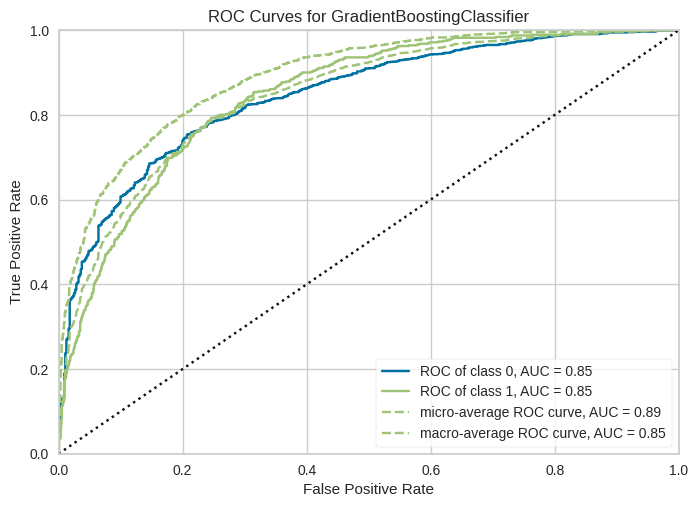

In [ ]:
# AUC Plot**
plot_model(tuned_best_model, plot = 'auc')

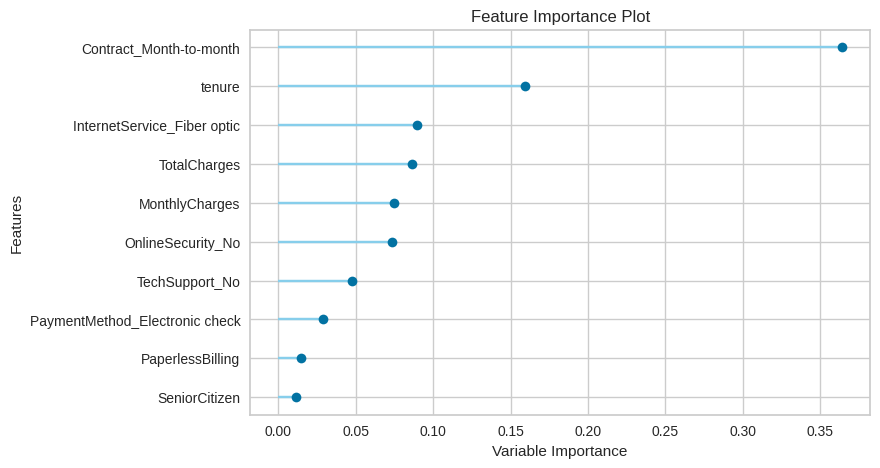

In [ ]:
# Feature Importance Plot**
plot_model(tuned_best_model, plot = 'feature')

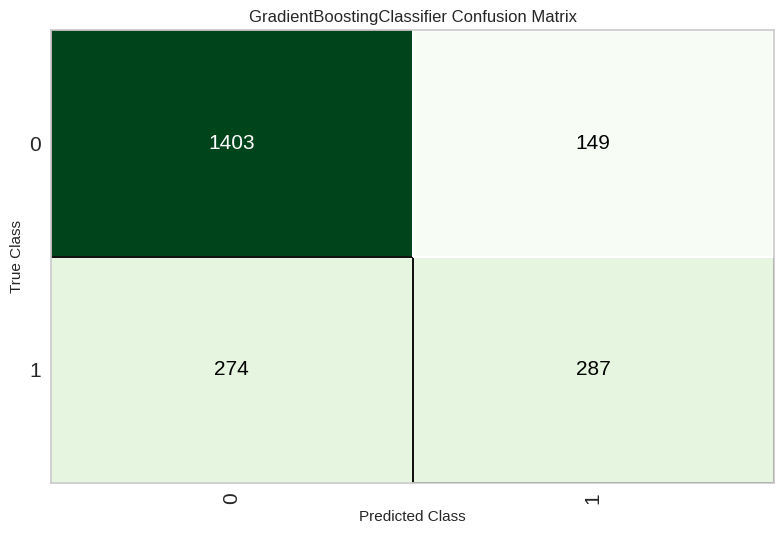

In [ ]:
# Confusion Matrix**
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [ ]:
# create a custom function (metric)
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])

 #add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

,profit
Name,Profit
Display Name,Profit
Score Function,<pycaret.internal.metrics.EncodedDecodedLabels...
Scorer,"make_scorer(calculate_profit, response_method=..."
Target,pred
Args,{}
Greater is Better,True
Multiclass,True
Custom,True


In [ ]:
# compare all models**
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lr,Logistic Regression,0.8030,0.8451,0.8030,0.7956,0.7975,0.4689,0.4723,0.0000,1.6290
knn,K Neighbors Classifier,0.7655,0.7497,0.7655,0.7521,0.7559,0.3551,0.3595,0.0000,0.3490
nb,Naive Bayes,0.6913,0.8204,0.6913,0.7963,0.7092,0.3778,0.4247,0.0000,0.3240
dt,Decision Tree Classifier,0.7148,0.6418,0.7148,0.7189,0.7165,0.2780,0.2785,0.0000,0.5160
svm,SVM - Linear Kernel,0.6641,0.6726,0.6641,0.7732,0.6355,0.2625,0.3188,0.0000,0.4040
ridge,Ridge Classifier,0.7994,0.8374,0.7994,0.7899,0.7915,0.4494,0.4552,0.0000,0.2890
rf,Random Forest Classifier,0.7876,0.8218,0.7876,0.7767,0.7789,0.4160,0.4215,0.0000,1.1950
qda,Quadratic Discriminant Analysis,0.6586,0.8246,0.6586,0.7998,0.6763,0.3449,0.4088,0.0000,0.2940
ada,Ada Boost Classifier,0.8022,0.8472,0.8022,0.7929,0.7944,0.4575,0.4632,0.0000,0.6670
gbc,Gradient Boosting Classifier,0.8006,0.8481,0.8006,0.7916,0.7932,0.4550,0.4602,0.0000,1.2890


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# compare all models**
best_model = compare_models(sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
lr,Logistic Regression,0.8030,0.8451,0.8030,0.7956,0.7975,0.4689,0.4723,0.0000,0.7540
ada,Ada Boost Classifier,0.8022,0.8472,0.8022,0.7929,0.7944,0.4575,0.4632,0.0000,0.7760
gbc,Gradient Boosting Classifier,0.8006,0.8481,0.8006,0.7916,0.7932,0.4550,0.4602,0.0000,1.3340
ridge,Ridge Classifier,0.7994,0.8374,0.7994,0.7899,0.7915,0.4494,0.4552,0.0000,0.4650
catboost,CatBoost Classifier,0.7974,0.8407,0.7974,0.7880,0.7896,0.4453,0.4508,0.0000,6.6670
lda,Linear Discriminant Analysis,0.7968,0.8374,0.7968,0.7902,0.7922,0.4572,0.4595,0.0000,0.3040
lightgbm,Light Gradient Boosting Machine,0.7903,0.8352,0.7903,0.7823,0.7846,0.4356,0.4385,0.0000,1.3380
rf,Random Forest Classifier,0.7876,0.8218,0.7876,0.7767,0.7789,0.4160,0.4215,0.0000,0.9190
xgboost,Extreme Gradient Boosting,0.7809,0.8214,0.7809,0.7736,0.7761,0.4154,0.4173,0.0000,0.4420
et,Extra Trees Classifier,0.7682,0.7922,0.7682,0.7563,0.7595,0.3661,0.3704,0.0000,1.2080


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38620 sha256=cfce4fd42894e7a1399deaa9271956564bd2fa1dd9e2c0eab36071880e3e92f4
  Stored in directory: /root/.cache/pip/wheels/c6/bc/18/da12b3c280d31beeac0c0f491c8f370da7c1473a56d7d4b5f3
Successfully built yahoofinancials


Predicción del precio del oro

In [ ]:
#Importing Libraries***
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [ ]:
ticker_details = pd.read_excel("/content/Ticker List.xlsx")
ticker = ticker_details['Ticker'].to_list()
names = ticker_details['Description'].to_list()
ticker_details.head(20)

,Ticker,Description
0,GC=F,Gold
1,SI=F,Silver
2,CL=F,Crude Oil
3,^GSPC,S&P500
4,^RUT,Russel 2000 Index
5,ZN=F,10 Yr US T-Note futures
6,ZT=F,2 Yr US T-Note Futures
7,PL=F,Platinum
8,HG=F,Copper
9,DX=F,Dollar Index


In [ ]:
#Creating Date Range and adding them to values table***
end_date= "2025-01-21"
start_date = "2010-01-01"
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [ ]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
for i in ticker:
    raw_data = YahooFinancials(i)
    raw_data = raw_data.get_historical_price_data(start_date, end_date, "daily")

    # Check if raw_data[i] is not None before proceeding
    if raw_data[i] is not None:
        df = pd.DataFrame(raw_data[i]['prices'])[['formatted_date','adjclose']]
        df.columns = ['Date1',i]
        df['Date1']= pd.to_datetime(df['Date1'])
        values = values.merge(df,how='left',left_on='Date',right_on='Date1')
        values = values.drop(labels='Date1',axis=1)
    else:
        print(f"Could not retrieve data for ticker: {i}")  # Print a message for debugging

#Renaming columns to represent instrument names rather than their ticker codes for ease of readability***
names.insert(0,'Date')
values.columns = names
print(values.shape)
print(values.isna().sum())
#Front filling the NaN values in the data set***
values = values.fillna(method="ffill",axis=0)
values = values.fillna(method="bfill",axis=0)
values.isna().sum()

# Coercing numeric type to all columns except Date***
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)
values.tail()

Could not retrieve data for ticker: S=F


ValueError: Length mismatch: Expected axis has 27 elements, new values have 17 elements

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
#Ponemos nombre a las columnas y cargamos el dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv",  delimiter=r"\s+", header=None, names=column_names)
print(df.shape)
df.describe()
#Ponemos com target la columna MEDV
target_column = ['MEDV']
#Separamos el target de los predictores
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040612,0.113636,0.401470,0.069170,0.636849,0.715790,0.685749,0.312954,0.397892,0.574173,0.838888,0.898650,0.333238,22.532806
std,0.096672,0.233225,0.247309,0.253994,0.133040,0.080025,0.281489,0.173645,0.362802,0.237042,0.098407,0.230020,0.188071,9.197104
min,0.000071,0.000000,0.016583,0.000000,0.442021,0.405581,0.029000,0.093151,0.041667,0.263010,0.572727,0.000806,0.045562,5.000000
25%,0.000922,0.000000,0.187094,0.000000,0.515499,0.670330,0.450250,0.173189,0.166667,0.392405,0.790909,0.945773,0.183039,17.025000
50%,0.002883,0.000000,0.349315,0.000000,0.617681,0.707118,0.775000,0.264499,0.208333,0.464135,0.865909,0.986243,0.299184,21.200000
75%,0.041327,0.125000,0.652487,0.000000,0.716418,0.754385,0.940750,0.427858,1.000000,0.936709,0.918182,0.998299,0.446537,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [ ]:
#Separamos el dataset en train y test
X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(354, 13)
(152, 13)


In [ ]:
# Definimos el modelo
model = Sequential()
model.add(Dense(500, input_dim=13, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary() #Print model Summary

In [ ]:
# prompt: ya tenemos el modelo definido en la celda anterior, ahora lo preparamos, compilamos añadiendo función de pérdida, optimizador etc., entrenamos, ,probamos, clasificamos y obtenemos el error

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=200)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
print('RMSE:', rmse)
